In [9]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

from function_splitting import crop_axis, form_x_y_polygons
from functions_voronoi import voronoi_finite_polygons_2d, voronoi_polygons

np.set_printoptions(suppress=True)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
INPUT_WIDTH = 1000
INPUT_HEIGHT = 400

in_points = np.array([[x, y] for x in range(INPUT_WIDTH) for y in range(INPUT_HEIGHT)])
in_points.shape

(400000, 2)

In [11]:
N_points = 25

kmeans = KMeans(n_clusters=N_points, random_state=0)
clusters = kmeans.fit_predict(in_points)
new_points = np.array([np.mean(in_points[clusters == curr], axis=0) for curr in set(clusters)])
new_points += np.array([[x_r, y_r] for x_r,y_r in zip(np.random.randint(N_points, size=N_points), 
                                                      np.random.random(N_points)+np.random.randint(N_points, size=N_points))])
new_points.shape

(25, 2)

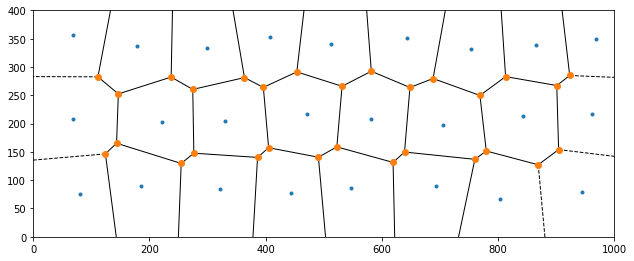

In [12]:
vor = Voronoi(new_points)

fig, ax = plt.subplots()
fig = voronoi_plot_2d(vor, ax, show_vertices=True)
ax.set_xlim((0, INPUT_WIDTH))
ax.set_ylim((0, INPUT_HEIGHT))
fig.set_size_inches(INPUT_WIDTH/96.0, INPUT_HEIGHT/96.0)

In [14]:
polygons = voronoi_polygons(new_points)
cropped_polygons = crop_axis(polygons, range_x=(0, INPUT_WIDTH), range_y=(0, INPUT_HEIGHT))
x_polygs, y_polygs = form_x_y_polygons(cropped_polygons)


fig = go.Figure(go.Scatter(x=x_polygs, y=y_polygs, mode='lines+markers'))
fig.add_trace(go.Scatter(x=[0, 0, INPUT_WIDTH, INPUT_WIDTH, 0],
                        y=[0, INPUT_HEIGHT, INPUT_HEIGHT, 0, 0], mode="lines+markers"))
# fig.update_layout(yaxis_range=[0, INPUT_HEIGHT], xaxis_range=[0, INPUT_WIDTH])
fig.show()